# Text Preprocessing


In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
df = pd.read_csv("Datasets/PPN.csv")
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873869673743491336,Mon Dec 30 23:54:34 +0000 2024,0,@likromiahooy Paginya ppn naik 12%,1873880391230333420,NaN,likromiahooy,in,NaN,0,0,0,https://x.com/nwotariz/status/1873880391230333420,1313516922353283073,nwotariz
1,1873538051047334049,Mon Dec 30 23:50:29 +0000 2024,2,@AdamVelcro 1. Krn sudah dikondisikan di media...,1873879360413065392,NaN,AdamVelcro,in,most beautiful place on earth,0,1,0,https://x.com/staysaferek/status/1873879360413...,932657813930721280,staysaferek
2,1873758639783289310,Mon Dec 30 23:49:49 +0000 2024,0,@exhumaclown rapat ppn krn naik jadi 12% kah?,1873879192255013092,NaN,exhumaclown,in,she/her,0,1,0,https://x.com/ikeulabs/status/1873879192255013092,768414071137775616,ikeulabs
3,1873878259844419990,Mon Dec 30 23:46:06 +0000 2024,0,Apakah ini hari pemborosan sebelum ppn naik 12%?,1873878259844419990,NaN,NaN,in,🇮🇩,1,1,0,https://x.com/flyashh/status/1873878259844419990,997760451592183808,flyashh
4,1873702424453796059,Mon Dec 30 23:33:38 +0000 2024,0,@kompascom Kl pabrik / usaha nya yg memproduks...,1873875120198197421,NaN,kompascom,in,NaN,0,0,0,https://x.com/RamsDews/status/1873875120198197421,1714509511883628544,RamsDews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1873302564785328367,Sun Dec 29 09:38:30 +0000 2024,0,Udah pasrah dan nrimo ing pandum nek PPN bakal...,1873302564785328367,NaN,NaN,in,rant | dnf,1,0,0,https://x.com/sarfellas/status/187330256478532...,1748710991985254400,sarfellas
307,1873302371658518960,Sun Dec 29 09:37:44 +0000 2024,0,Yang bilang ppn 12% cuma menyasar barang mewah...,1873302371658518960,NaN,NaN,in,Indonesia,0,1,0,https://x.com/legawalif/status/187330237165851...,524421662,legawalif
308,1873302368424718762,Sun Dec 29 09:37:43 +0000 2024,0,kalo ppn naik 12% apakah ini tandanya aku haru...,1873302368424718762,NaN,NaN,in,NaN,0,1,0,https://x.com/choconitaa/status/18733023684247...,1520777100470669312,choconitaa
309,1872950745991094456,Sun Dec 29 09:37:33 +0000 2024,0,@abu_waras Kalopun ppn tetep naik 12% setidakn...,1873302327446356265,NaN,abu_waras,in,Yggdrasill,0,0,0,https://x.com/Frmnsyh_10/status/18733023274463...,1193552305548746752,Frmnsyh_10


## Case Folding

In [8]:
df['lower_case'] = df['full_text'].str.lower()
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,lower_case
0,1873869673743491336,Mon Dec 30 23:54:34 +0000 2024,0,@likromiahooy Paginya ppn naik 12%,1873880391230333420,NaN,likromiahooy,in,NaN,0,0,0,https://x.com/nwotariz/status/1873880391230333420,1313516922353283073,nwotariz,@likromiahooy paginya ppn naik 12%
1,1873538051047334049,Mon Dec 30 23:50:29 +0000 2024,2,@AdamVelcro 1. Krn sudah dikondisikan di media...,1873879360413065392,NaN,AdamVelcro,in,most beautiful place on earth,0,1,0,https://x.com/staysaferek/status/1873879360413...,932657813930721280,staysaferek,@adamvelcro 1. krn sudah dikondisikan di media...
2,1873758639783289310,Mon Dec 30 23:49:49 +0000 2024,0,@exhumaclown rapat ppn krn naik jadi 12% kah?,1873879192255013092,NaN,exhumaclown,in,she/her,0,1,0,https://x.com/ikeulabs/status/1873879192255013092,768414071137775616,ikeulabs,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,1873878259844419990,Mon Dec 30 23:46:06 +0000 2024,0,Apakah ini hari pemborosan sebelum ppn naik 12%?,1873878259844419990,NaN,NaN,in,🇮🇩,1,1,0,https://x.com/flyashh/status/1873878259844419990,997760451592183808,flyashh,apakah ini hari pemborosan sebelum ppn naik 12%?
4,1873702424453796059,Mon Dec 30 23:33:38 +0000 2024,0,@kompascom Kl pabrik / usaha nya yg memproduks...,1873875120198197421,NaN,kompascom,in,NaN,0,0,0,https://x.com/RamsDews/status/1873875120198197421,1714509511883628544,RamsDews,@kompascom kl pabrik / usaha nya yg memproduks...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1873302564785328367,Sun Dec 29 09:38:30 +0000 2024,0,Udah pasrah dan nrimo ing pandum nek PPN bakal...,1873302564785328367,NaN,NaN,in,rant | dnf,1,0,0,https://x.com/sarfellas/status/187330256478532...,1748710991985254400,sarfellas,udah pasrah dan nrimo ing pandum nek ppn bakal...
307,1873302371658518960,Sun Dec 29 09:37:44 +0000 2024,0,Yang bilang ppn 12% cuma menyasar barang mewah...,1873302371658518960,NaN,NaN,in,Indonesia,0,1,0,https://x.com/legawalif/status/187330237165851...,524421662,legawalif,yang bilang ppn 12% cuma menyasar barang mewah...
308,1873302368424718762,Sun Dec 29 09:37:43 +0000 2024,0,kalo ppn naik 12% apakah ini tandanya aku haru...,1873302368424718762,NaN,NaN,in,NaN,0,1,0,https://x.com/choconitaa/status/18733023684247...,1520777100470669312,choconitaa,kalo ppn naik 12% apakah ini tandanya aku haru...
309,1872950745991094456,Sun Dec 29 09:37:33 +0000 2024,0,@abu_waras Kalopun ppn tetep naik 12% setidakn...,1873302327446356265,NaN,abu_waras,in,Yggdrasill,0,0,0,https://x.com/Frmnsyh_10/status/18733023274463...,1193552305548746752,Frmnsyh_10,@abu_waras kalopun ppn tetep naik 12% setidakn...


## Tokenization

In [9]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: @likromiahooy paginya ppn naik 12%
Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


In [10]:
#SPACY
#python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm")

In [11]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: @likromiahooy paginya ppn naik 12%
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Stemming

In [12]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Lemmatization

In [13]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Lemmatization: ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Lemmatization: ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Remove Stopwords

In [14]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Word Cloud

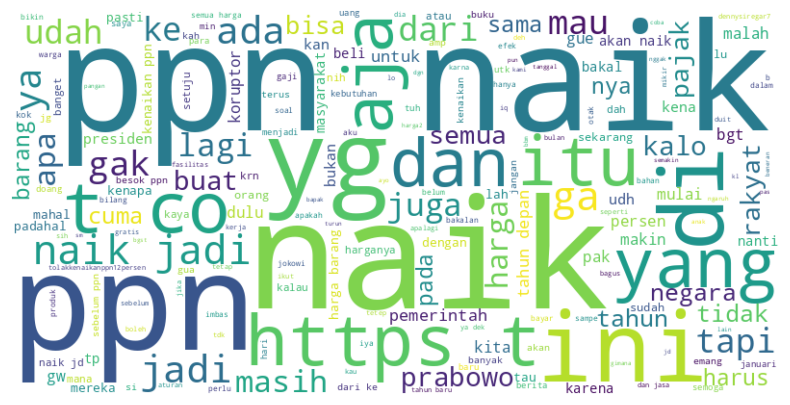

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.show()


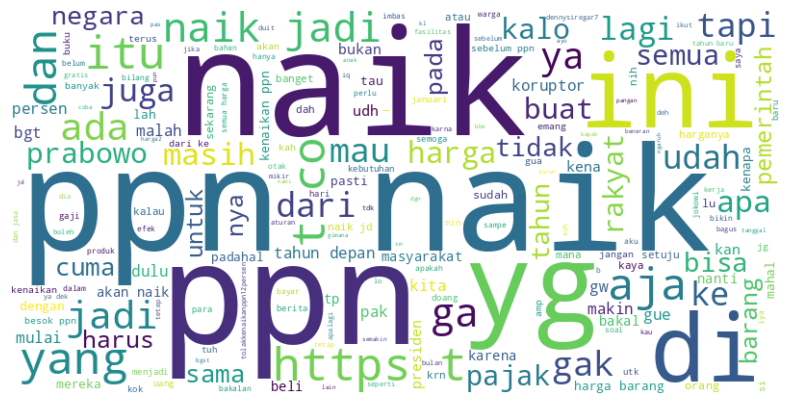

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

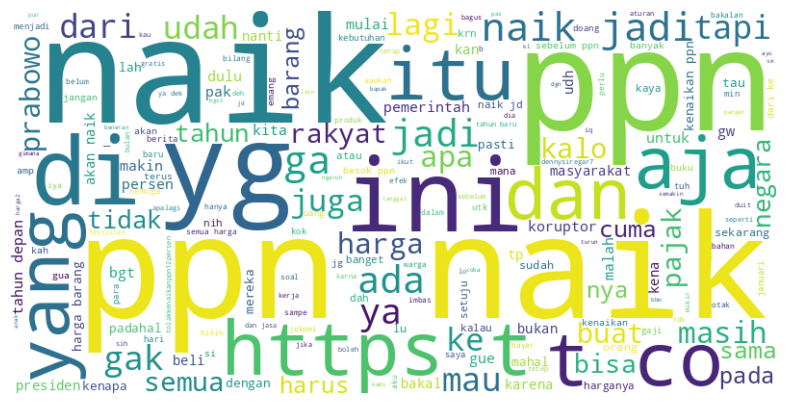

In [17]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()